In [1]:
import os
import re
import glob
import json
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

import shapely

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
product = 'ENSEMBLE'

In [3]:
with open ('../../json/directories.json') as f:
    DIRS = json.load(f)

In [4]:
andes = list(shpreader.Reader(DIRS['mapping']+'andes_1000.shp').geometries())
commu = list(shpreader.Reader('/mnt/Data/Github/Complex-Network-AS/mapping/communities/Comm_IMERG_05x05_sync_summer_P90_tau3_SP95.shp').geometries())

In [5]:
#Using IMERG 05x05 grid
file_in = DIRS['dir_IMERG'] + 'IMERG_2000_12_2020_12_24h_05x05_summer.nc'

data = ca.read_netcdf(file_in,0)
lat = data['lat'].data
lon = data['lon'].data

lon2d, lat2d = np.meshgrid(lon, lat)

nlat = len(lat)
nlon = len(lon)

res_y = lat[1]-lat[0]
res_x = lon[1]-lon[0]

del data

print(f'Latitude points   : {nlat}')
print(f'Longitude points  : {nlon}')
print(f'Spatial resolution: {res_x}x{res_y}')

Latitude points   : 120
Longitude points  : 110
Spatial resolution: 0.5x0.5


In [6]:
xmin, ymin, xmax, ymax= np.min(lon2d)-0.25,np.min(lat2d)+0.25,np.max(lon2d)-0.25,np.max(lat2d)+0.25

# how many cells across and down
cell_size_y=0.5
cell_size_x=0.5

# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size_x, cell_size_x ):
    for y0 in np.arange(ymin, ymax+cell_size_y, cell_size_y):
        # bounds
        x1 = x0+cell_size_x
        y1 = y0-cell_size_y
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )

cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs="EPSG:4326")
cell = cell.reset_index()

In [7]:
file_list = pd.read_csv(DIRS['dir_ENSEMBLE_list']+'TRMM_GPM_summer_200012_2021_02.csv')
len_files = len(file_list)
print(f'Files Number: {len_files}')
print(file_list['file_name'].iloc[0])
print(file_list['file_name'].iloc[-1])

Files Number: 63
/mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200012_level2.csv
/mnt/Data/Data/PF/GPM/rgpf_SA/rgpf_202102_level2.csv


In [8]:
# Show columns
data_tmp = pd.read_csv(file_list['file_name'].iloc[0])
data_tmp.columns

Index(['lat', 'lon', 'YEAR', 'ORBIT', 'NPIXELS_20DBZ', 'NPIXELS_30DBZ',
       'NPIXELS_40DBZ', 'NPIXELS_50DBZ', 'NPIXELS_20MM', 'NPIXELS_30MM',
       'NPIXELS_40MM', 'NPIXELS_50MM', 'VOLRAIN_20DBZ', 'VOLRAIN_30DBZ',
       'VOLRAIN_40DBZ', 'VOLRAIN_50DBZ', 'VOLRAIN_20MM', 'VOLRAIN_30MM',
       'VOLRAIN_40MM', 'VOLRAIN_50MM', 'MIN85PCT', 'MIN37PCT', 'NLT250',
       'NLT225', 'N37LT250', 'N37LT225', 'MAXHT20', 'MAXHT30', 'MAXHT40',
       'NSTRAT', 'RAINSTRAT', 'NCONV', 'RAINCONV'],
      dtype='object')

In [220]:
# var = 'NPIXELS_20DBZ'
# val_min = 1
# var_name = '20dbz_pixels_GT_'+str(val_min)
# long_name = 'Number of pixel with 20dbz'
# units = '# pixels'

# var = 'NPIXELS_30DBZ'
# val_min = 1
# var_name = '30dbz_pixels_GT_'+str(val_min)
# long_name = 'Number of pixel with 30dbz'
# units = '# pixels'

# var = 'NPIXELS_40DBZ'
# val_min = 1
# var_name = '40dbz_pixels_GT_'+str(val_min)
# long_name = 'Number of pixel with 40dbz'
# units = '# pixels'

# var = 'NPIXELS_50DBZ'
# val_min = 1
# var_name = '50dbz_pixels_GT_'+str(val_min)
# long_name = 'Number of pixel with 50dbz'
# units = '# pixels'

# var = 'MAXHT20'
# val_min = 1
# var_name = 'MAXHT20_GT_'+str(val_min)+'km'
# long_name = 'Maximum height with 20 dBZ echo (km)'
# units = 'km'

# var = 'MAXHT30'
# val_min = 1
# var_name = 'MAXHT30_GT_'+str(val_min)+'km'
# long_name = 'Maximum height with 30 dBZ echo (km)'
# units = 'km'

# var = 'MAXHT40'
# val_min = 1
# var_name = 'MAXHT40_GT'+str(val_min)+'km'
# long_name = 'Maximum height with 40 dBZ echo (km)'
# units = 'km'

# var = 'NPIXELS_20MM'
# val_min = 1
# var_name = 'NPIXELS_20MM_GT_'+str(val_min)
# long_name = 'Number of pixel with 20mm'
# units = '# pixels'

# var = 'NPIXELS_40MM'
# val_min = 1
# var_name = 'NPIXELS_40MM_GT_'+str(val_min)
# long_name = 'Number of pixel with 40mm'
# units = '# pixels'

# var = 'NCONV'
# val_min = 1
# var_name = 'NCONV_GT_'+str(val_min)
# long_name = 'Number of Convective Pixels'
# units = '# pixels'

# var = 'RAINCONV'
# val_min = 1
# var_name = 'RAINCONV_GT_'+str(val_min)
# long_name = 'Convective volumetric rain'
# units = '(mm/hr*km^2)'

# var = 'MIN85PCT'
# val_min = 225
# var_name = 'MIN85PCT_LT_225K_'+str(val_min)
# long_name = 'Minimum XX GHz polarization correction TB'
# units = 'K'

var = 'NLT225'
val_min = 1
var_name = 'NLT225_EQ_225K_'+str(val_min)
long_name = 'Number of PR pixels with 85 GHz PCT < 225 K'
units = 'K'

In [221]:
pf_count = np.ones([len_files,nlat,nlon])*np.nan

print(f'variable: {var}')

for t in range(len_files):

    file_in = file_list['file_name'][t]
    name_out = file_in.split('/')[-1]

    if t == 0 or t==int((len_files-1)/2) or t==len_files-1:
        print(name_out)

    data = pd.read_csv(file_in)
    # data_cut = data[(data['NPIXELS_30MM']!=0)&(data[var]<225)]
    data_cut = data[data[var]>=val_min]
    # data_cut = data[data[var]<val_min] #PCT

    PF_GPD = gpd.GeoDataFrame(data=data_cut[var],geometry=gpd.points_from_xy(data_cut['lon'],data_cut['lat'], crs="EPSG:4326"))

    wells_cell = gpd.sjoin(PF_GPD, cell, how = "inner", predicate = "intersects")

    test = wells_cell.groupby(['index_right'], as_index=False).mean()
    # test = wells_cell.groupby(['index_right'], as_index=False).sum()

    bay_area_grid = cell.merge(test, on = 'index', how = "left")
    # bay_area_grid[var] = bay_area_grid[var].fillna(0)

    data_out = bay_area_grid[var].values.reshape(nlon, nlat).T

    pf_count[t,:,:] = data_out

variable: NLT225
rpf_200012_level2.csv
rpf_201101_level2.csv
rgpf_202102_level2.csv


In [222]:
nameout = DIRS['dir_ENSEMBLE'] + product+'_count_'+var_name+'.nc'
title = long_name +' for IMERG grid 0.5x0.5'

info = {'file': nameout,
        'title': title,
        'year_start':2014,'month_start':3,'day_start':1,'hour_start':0,'minute_start':0,
        'year_end':2019,'month_end':5,'day_end':1,'hour_end':23,'minute_end':59,
        'time_frequency': 'Monthly',
        'time_interval':1,
        'var_name': 'count',
        'var_units': 'adim'}

print(f'count shape : {pf_count.shape}')
print(f'file nameout: {nameout}')
print(f'file title  : {title}')

count shape : (63, 120, 110)
file nameout: /mnt/Data/Data/PF/ENSEMBLE/ENSEMBLE_SA/ENSEMBLE_count_NLT225_EQ_225K_1.nc
file title  : Number of PR pixels with 85 GHz PCT < 225 K for IMERG grid 0.5x0.5


In [223]:
ca.create_netcdf(info,pf_count,lat,lon)

Time Start: 2014-03-01 00:00:00
Time End: 2019-05-01 00:00:00
Time Frequency: Monthly
Time Lenght: 63

File created in:  /mnt/Data/Data/PF/ENSEMBLE/ENSEMBLE_SA/ENSEMBLE_count_NLT225_EQ_225K_1.nc
File title:  Number of PR pixels with 85 GHz PCT < 225 K for IMERG grid 0.5x0.5
var title:  count
var units:  adim


In [224]:
val_sum = np.nansum(pf_count,axis=0)
val_mean = np.nanmean(pf_count,axis=0)
val_max = np.nanmax(pf_count,axis=0)

print(np.nanpercentile(val_mean,99),np.nanmax(val_mean))
print(np.nanpercentile(val_max,99),np.nanmax(val_max))

# Outliers removal
tmp_mean = sorted(list(np.reshape(val_mean,[nlat*nlon])),reverse=True)
# val_mean[val_mean > tmp_mean[4]] = np.nan # Number of convective pixels
# val_mean[val_mean > tmp_mean[6]] = np.nan # RAINCONV

tmp_max = sorted(list(np.reshape(val_max,[nlat*nlon])),reverse=True)
# val_max[val_max > tmp_max[4]] = np.nan # Number of convective pixels
# val_max[val_max > tmp_max[6]] = np.nan # RAINCONV

295.5 1485.0
1159.3600000000006 4937.0


/tmp/ipykernel_14539/1839396392.py:2: RuntimeWarning: Mean of empty slice
  val_mean = np.nanmean(pf_count,axis=0)
/tmp/ipykernel_14539/1839396392.py:3: RuntimeWarning: All-NaN slice encountered
  val_max = np.nanmax(pf_count,axis=0)


In [225]:
# count number of events por pixel
number_events = np.zeros([nlat,nlon])

for i in range(nlat):
    for j in range(nlon):
        number_events[i,j] = len(np.where(~np.isnan(pf_count[:,i,j]))[0])

In [226]:
# mean ignoring pixels with lower than 2 values
test = np.zeros_like(val_mean)

for i in range(nlat):
    for j in range(nlon):
        tmp = pf_count[:,i,j]
        if len(tmp[~np.isnan(tmp)]) < 2:
            test[i,j] = np.nan
        else:
            test[i,j] = np.nanmean(tmp)

../../images/ENSEMBLE/ENSEMBLE_NLT225_EQ_225K_1.png


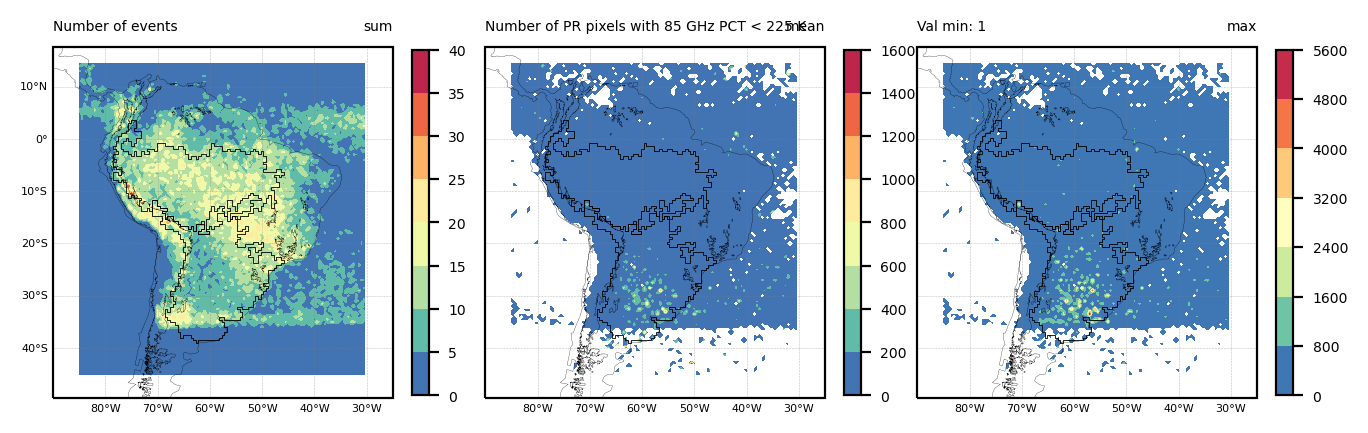

In [227]:
linewidth_limit = 0.5

# cmap reds
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8),dpi=200)
gs = gridspec.GridSpec(1,3)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.1,zorder=5)
ax1.set_extent([-90,-25,-45,15])
ax1.add_geometries(commu,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.3,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, number_events,levels=None,cmap=cmap)
cbar = plt.colorbar(a1,fraction=0.046,ticks=None)
cbar.ax.tick_params(labelsize=5) 

ax1.set_title('Number of events',fontsize=5,loc='left')
ax1.set_title('sum',fontsize=5,loc='right')

#=====================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.1,zorder=5)
ax1.set_extent([-90,-25,-45,15])
ax1.add_geometries(commu,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.3,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, val_mean,levels=None,cmap=cmap)
cbar = plt.colorbar(a1,fraction=0.046,ticks=None)
cbar.ax.tick_params(labelsize=5) 

ax1.set_title(long_name,fontsize=5,loc='left')
ax1.set_title('mean',fontsize=5,loc='right')

#=====================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.1,zorder=5)
ax1.set_extent([-90,-25,-45,15])
ax1.add_geometries(commu,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.3,zorder=5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, val_max,levels=None,cmap=cmap)
cbar = plt.colorbar(a1,fraction=0.046,ticks=None)
cbar.ax.tick_params(labelsize=5) 

ax1.set_title('Val min: '+str(val_min),fontsize=5,loc='left')
ax1.set_title('max',fontsize=5,loc='right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.15)

salida = DIRS['dir_images'] + product + '/' + 'ENSEMBLE_' + var_name + '.png'
print(salida)
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.05, facecolor='white')